In [1]:
import pandas as pd
import numpy as np
import cplex

from sys import path
path.append("..") 
import matplotlib.pyplot as plt

from CPNorm import CorrNorm

In [17]:
df = pd.DataFrame({
    'A': [20000,300000,4000000, 80000000],
    'B': [100,1000,10000,100000],
    'C': [100,1000,10000,100000],
    'D': [34,340,3400, 34000]

}, index=['cell1', 'cell2', 'cell3', 'cell4'])
normalization = CorrNorm(df, 0.999999)
normalization.write_problem()
normalization.solve()
result = normalization.get_beta_values()
print(normalization.get_normalized_data())
print(normalization.get_beta_values())


[4.306081745657977, 5.480495608739412, 6.604593211581229, 7.904358444135988]


Default row names c1, c2 ... being created.


Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Aggregator did 1 substitutions.
Reduced QCP has 61 rows, 58 columns, and 147 nonzeros.
Reduced QCP has 9 quadratic constraints.
Presolve time = 0.00 sec. (0.03 ticks)
Parallel mode: using up to 12 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1290
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.04 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 12
  Rows in Factor            = 61
  Integer space required    = 108
  Total non-zeros in factor = 1375
  Total FP ops to factor    = 44023
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.8284271e+00  -1.0000000e+00  2.96e+01  0.00e+00  2.29e+01  1.00e+00
   1   2.6140575e+00   2.1098232e+00  2.96e+01  0.00e+00  2.29e+01  1.15e+00
   2   9.8023963e-01   7.8006538e-01  1.06e+01  0.00e+00 

In [13]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS
resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation
etaList = np.arange(0.0, 1.0, 0.1).tolist()
etaList =  [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0] + etaList
for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = np.mean(np.abs(normalization.get_covariance_thresholds()))
    meanAbsCov = normalization.get_mean_of_absolute_covariances()

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov}
    resultDF = resultDF.append(new_row, ignore_index=True)
    print("VARIABLES!!")
    print(normalization.get_covariance_thresholds())
    print(libVar)

0      6.186177
1      5.292032
2      5.189910
3      5.168359
4      5.005427
5      5.214027
6      2.101887
7      1.490974
8      1.436706
9      1.428958
10    15.092483
11    12.456547
12    11.641796
13    11.057496
14    10.463485
15     9.823667
16     9.073210
17     8.191015
18     7.207035
19     6.186177
Name: MeanAbsCov, dtype: float64
0     3.983961e+11
1     4.221188e+11
2     4.248668e+11
3     4.250774e+11
4     4.305186e+11
5     9.950747e+11
6     1.384668e+13
7     2.539158e+13
8     2.697106e+13
9     2.720710e+13
10    1.894556e-01
11    7.059142e+10
12    1.270376e+11
13    1.763853e+11
14    2.248552e+11
15    2.673557e+11
16    3.050987e+11
17    3.391002e+11
18    3.700420e+11
19    3.983961e+11
Name: VarLib, dtype: float64
[0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0, 0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


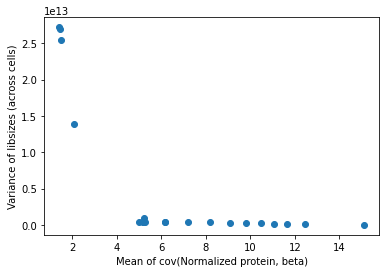

In [14]:
print(resultDF['MeanAbsCov'])
print(resultDF['VarLib'])
print(etaList)

plt.scatter((resultDF['MeanAbsCov']), (resultDF['VarLib']))
plt.xlabel('Mean of cov(Normalized protein, beta)')
plt.ylabel('Variance of libsizes (across cells)')
plt.show()

In [16]:
eta = 0.1

normalization = CorrNorm(df, eta)
normalization.write_problem()
normalization.solve()

print(normalization.get_normalized_data())

[4.607111741321958, 5.480495608739412, 6.604593211581229, 7.6033284484720065]


Default row names c1, c2 ... being created.


Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Aggregator did 1 substitutions.
Reduced QCP has 61 rows, 58 columns, and 147 nonzeros.
Reduced QCP has 9 quadratic constraints.
Presolve time = 0.00 sec. (0.03 ticks)
Parallel mode: using up to 12 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1290
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.04 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 12
  Rows in Factor            = 61
  Integer space required    = 108
  Total non-zeros in factor = 1375
  Total FP ops to factor    = 44023
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.8284271e+00  -1.0000000e+00  2.47e+01  0.00e+00  4.48e+01  1.00e+00
   1   7.3251418e-01   5.4500316e-01  2.47e+01  0.00e+00  4.48e+01  1.43e+00
   2  -1.3992471e+00  -1.4618104e+00  5.74e+00  0.00e+00 

In [4]:
df = pd.read_csv("/Users/t.stohn/Desktop/Projects/scNormalization/CorrelationPreservationNorm/test/LinearTrajectory/Simulation.tsv", sep = "\t")
df = df[["sample_id","ab_id","ab_count_normalized"]]
df = df.pivot(index="sample_id", columns="ab_id", values="ab_count_normalized")

df

ab_id,AB0,AB1,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB17,AB18,AB19,AB2,AB3,AB4,AB5,AB6,AB7,AB8,AB9
sample_id,,,,,,,,,,,,,,,,,,,,
sample_1,1766556.0,9145607.0,3551513.0,5115651.0,2447416.0,2539424.0,10783352.0,4361185.0,3036268.0,12531506.0,2778645.0,2686637.0,2852252.0,6274954.0,14518881.0,3349096.0,2981063.0,2134588.0,18714452.0,18677648.0
sample_10,893919.0,7065638.0,3049123.0,2669513.0,1787839.0,2253167.0,3575678.0,5498217.0,5461481.0,4800225.0,1947030.0,2522567.0,2473585.0,6453364.0,10420897.0,1077602.0,1126583.0,685746.0,3379750.0,13874120.0
sample_100,2920268.0,4772676.0,3988127.0,2985647.0,3465094.0,1656271.0,4903435.0,6908395.0,8869769.0,39576167.0,2440821.0,2571579.0,6341776.0,5775156.0,4031713.0,2724130.0,1852409.0,5186744.0,19875255.0,8782596.0
sample_101,1820762.0,8596763.0,5139620.0,4955239.0,2719619.0,6522477.0,3825905.0,6199810.0,4816953.0,31206479.0,5324001.0,3503238.0,3572381.0,6130667.0,27080955.0,3618477.0,4079429.0,1843810.0,30215431.0,29086098.0
sample_102,6532003.0,10802928.0,17963008.0,25813973.0,19784432.0,6720426.0,15576315.0,27509782.0,9107120.0,393553178.0,12749967.0,6532003.0,7034465.0,19847240.0,54579909.0,7348503.0,8730273.0,15073853.0,71977648.0,82466537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,1304789.0,4056907.0,2214852.0,4572244.0,4648996.0,2291604.0,5679669.0,8201530.0,3530605.0,17861354.0,2817906.0,1853020.0,1129355.0,4824430.0,4287164.0,1798197.0,921027.0,910063.0,14275926.0,8782655.0
sample_96,878673.0,6168284.0,3268663.0,6572474.0,3497118.0,4200057.0,3092929.0,5922256.0,3479545.0,14919867.0,1581611.0,878673.0,1441024.0,8364967.0,2864474.0,3883734.0,2056095.0,1089554.0,11967526.0,4182483.0
sample_97,6947034.0,19274102.0,16087868.0,10603367.0,18751768.0,9610934.0,9402001.0,8305101.0,9349767.0,68530139.0,3134000.0,6685867.0,9297534.0,20893335.0,40010736.0,4178667.0,7939467.0,5171100.0,50248471.0,83573340.0


In [24]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS
resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation
etaList = np.arange(0.0, 0.05, 0.003).tolist()
for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = (normalization.get_mean_of_absolute_covariances())

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov}
    resultDF = resultDF.append(new_row, ignore_index=True)

0     1.317230e+05
1     1.936706e+15
2     2.037914e+15
3     2.037914e+15
4     2.040942e+15
5     2.043787e+15
6     2.046486e+15
7     2.049069e+15
8     2.051635e+15
9     2.053973e+15
10    2.056146e+15
11    2.058273e+15
12    2.060405e+15
13    2.062403e+15
14    1.265891e+15
15    1.423030e+15
16    1.531275e+15
17    1.610713e+15
18    1.671692e+15
19    1.720282e+15
20    1.759840e+15
21    1.792689e+15
22    1.820491e+15
23    1.844104e+15
24    1.864693e+15
25    1.882672e+15
26    1.898546e+15
27    1.317230e+05
28    1.401261e+14
29    3.100239e+14
30    4.542249e+14
31    5.719885e+14
32    6.707196e+14
33    7.560931e+14
34    8.307645e+14
35    8.970960e+14
36    9.567648e+14
37    1.010256e+15
38    1.058706e+15
39    1.102881e+15
40    1.143229e+15
41    1.180164e+15
42    1.214379e+15
43    1.246018e+15
Name: VarLib, dtype: float64
0     1.458512e+06
1     1.042289e+06
2     1.038352e+06
3     1.038352e+06
4     1.038204e+06
5     1.038116e+06
6     1.038219e+06
7 

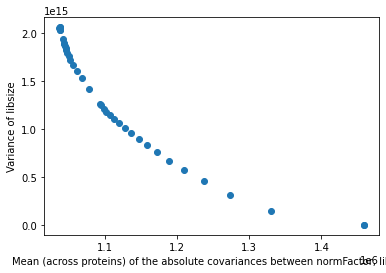

In [25]:

print(resultDF['VarLib'])
print(resultDF['MeanAbsCov'])
print(etaList)

# Create scatter plot
plt.scatter(resultDF['MeanAbsCov'], resultDF['VarLib'])

# Add labels and title
plt.xlabel('Mean (across proteins) of the absolute covariances between normFactor, libsize')
plt.ylabel('Variance of libsize')

# Show plot
plt.show()

In [5]:
normalization = CorrNorm(df, 0.05)
normalization.write_problem()
normalization.solve()

print(normalization.get_librarySize_variance())
print(normalization.get_mean_of_absolute_covariances())



[8.114766708587464, 7.908571032837742, 8.144972604418612, 8.279343187336346, 8.913656822835645, 8.545185384356953, 8.542838710691823, 8.298873492135256, 8.40684743980428, 8.368557744378858, 8.215402475928183, 7.704893605763836, 8.28696551519093, 8.24895202667026, 8.302565936178228, 8.434925029543392, 8.089455659567957, 8.429069882454504, 7.881108006981323, 8.253316239162693, 8.200490620281192, 7.9573699882825295, 8.559915131381915, 8.036619071733412, 8.38406608789022, 8.32718565822216, 8.227778022313222, 7.7760932402461425, 8.223628732220751, 7.575093768402287, 7.9364014950208315, 8.205423862741934, 7.951693703058689, 7.846818676827836, 7.974033406181849, 8.027394413235886, 8.410139075402592, 8.157709775980464, 8.129503227889922, 8.281551571466172, 8.395348184143957, 8.285254279536305, 8.27806102819291, 8.112245886594586, 8.407047650720118, 8.146054190032155, 8.34126792931873, 8.584565879034571, 8.407753952054353, 8.594390400999199, 7.9992196625991765, 8.34871470396888, 8.2749889307821

Default row names c1, c2 ... being created.


Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Aggregator did 1 substitutions.
Reduced QCP has 21085 rows, 20586 columns, and 61667 nonzeros.
Reduced QCP has 41 quadratic constraints.
Presolve time = 0.02 sec. (13.14 ticks)
Parallel mode: using up to 12 threads for barrier.

***NOTE: Found 41 dense columns.

Number of nonzeros in lower triangle of A*A' = 1292360
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.03 sec. (20.31 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 12
  Rows in Factor            = 21085
  Integer space required    = 41584
  Total non-zeros in factor = 1313445
  Total FP ops to factor    = 85141245
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.8284271e+00  -1.0000000e+00  7.37e+02  0.00e+00  5.02e+03  1.00e+00
   1  -1.2707686e+00  -1.7193020e+00  7.37e+02  0.00e+00  5.02e+03  2.78e+